In [1]:
import astropy.units as u
from astropy.coordinates.sky_coordinate import SkyCoord
from astropy.units import Quantity
from astroquery.gaia import Gaia

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Suppress warnings. Comment this out if you wish to see the warning messages
import warnings
warnings.filterwarnings('ignore')

In [3]:
# matplotlib settings 
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('lines', linewidth=2)
plt.rc('axes', linewidth=2)
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)   # fontsize of the figure title

In [4]:
job = Gaia.launch_job_async("SELECT * \
FROM gaiaedr3.gaia_source \
WHERE CONTAINS(POINT('ICRS',83.63305926163925,22.014497367986387),CIRCLE('ICRS',ra,dec,7.2))=1 \
AND phot_g_mean_mag<12 \
AND parallax > 0 \
AND parallax < 1 \
ORDER BY phot_g_mean_mag ASC;" \
, dump_to_file=True, output_file = 'crab_pulsar_trial9')

print (job)

Saving results to: crab_pulsar_trial9
Jobid: 1642189080227O
Phase: COMPLETED
Owner: None
Output file: crab_pulsar_trial9
Results: None


In [5]:
r = job.get_results()


In [6]:
import os
import sys, math
os.environ['DUST_DIR']= '/Users/cruz-cruz.1/DUST_DIR/'
import mwdust
import subprocess, shutil
import datetime
import numpy as np
import scipy.stats as sts
import astropy.units as u
from astropy.coordinates import SkyCoord
combined19= mwdust.Combined19(filter='CTIO V')

In [7]:
ra_og = r['ra']
dec_og = r['dec']
dist_og = 1/np.array(r['parallax'])

ra11 = []
dec11 = []
dist11 = []
for i in ra_og:
    ra11.append(i)    
for i in dec_og:
    dec11.append(i) 
for i in dist_og:
    dist11.append(i)

In [8]:
print(dec_og[0])

20.138441150108694


In [9]:
import math
pos_cp = [83.63305926163925,22.014497367986387]
v_cpx = (np.sin((np.pi/180)*(90-pos_cp[1]))*np.cos((np.pi*pos_cp[0])/180))
v_cpy = (np.sin((np.pi/180)*(90-pos_cp[1]))*np.sin((np.pi*pos_cp[0])/180))
v_cpz = (np.cos((np.pi/180)*(90-pos_cp[1])))
v_cp = [v_cpx,v_cpy,v_cpz]

unit_vcp = v_cp/np.linalg.norm(v_cp)

ra_stars = r['ra']
dec_stars = r['dec']
dist_par = r['parallax']
G_mag_mean =r['phot_g_mean_mag']
bprp = r['bp_rp']
bp_mean_mag = r['phot_bp_mean_mag']
rp_mean_mag = r['phot_rp_mean_mag']

star_cp_cross = []
mag_cross = []
accpt_ra = []
accpt_dec = []
accpt_parallax = []
accpt_Mg_mean = []
accpt_bprp = []
accpt_bp_mean_mag = []
accpt_rp_mean_mag = []
accpt_mag_cross = []
accpt_v_star = []
v_star = []
v_xstar = []
v_ystar = []
v_zstar = []
star_pos = []
star_cp_dot = []
accpt_dot = []

def magnitude(vector): 
    return math.sqrt(sum(pow(element, 2) for element in vector))

for i in range(len(ra_stars)):
    vx_star = (np.sin((np.pi/180)*(90-dec_stars[i]))*np.cos((np.pi*ra_stars[i])/180))
    vy_star = (np.sin((np.pi/180)*(90-dec_stars[i]))*np.sin((np.pi*ra_stars[i])/180))
    vz_star = (np.cos((np.pi/180)*(90-dec_stars[i])))
    v_star.append([vx_star,vy_star,vz_star])
    star_pos.append((1000*(np.array(v_star[i])))/dist_par[i])
    star_cp_cross.append(np.cross(unit_vcp,star_pos[i]))
    mag_cross.append(magnitude(np.array(star_cp_cross[i])))
    star_cp_dot.append(np.dot(unit_vcp,star_pos[i]))
    if mag_cross[i] < 100 :
        accpt_ra.append(ra_stars[i])
        accpt_dec.append(dec_stars[i])
        accpt_parallax.append(dist_par[i])
        accpt_Mg_mean.append(G_mag_mean[i])
        accpt_bprp.append(bprp[i])
        accpt_bp_mean_mag.append(bp_mean_mag[i])
        accpt_rp_mean_mag.append(rp_mean_mag[i])
        accpt_mag_cross.append(mag_cross[i])
        star_cp_dot_check = np.dot(unit_vcp,star_pos[i])
        accpt_dot.append(star_cp_dot_check)
        v_xstar.append(vx_star)
        v_ystar.append(vy_star)
        v_zstar.append(vz_star)
        accpt_v_star.append(star_pos[i])

Text(0.5, 0, '')

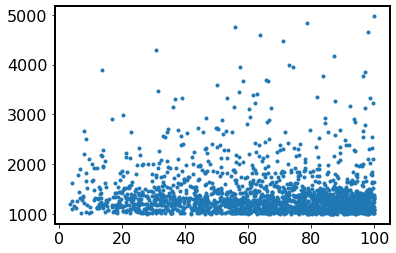

In [10]:
# distances are in pc 
plt.plot(accpt_mag_cross,accpt_dot,'.')
plt.ylabel('')
plt.xlabel('')

In [11]:
print(ra_stars[0],dec_stars[0])
print(v_star[0])
print()
print(star_pos[0])

90.97993942986818 20.138441150108694
[-0.016056758258839905, 0.938726156917579, 0.3442896786616904]

[ -21.02897616 1229.41690074  450.90418178]


In [12]:
dist_og = 1/np.array(accpt_parallax)
print(dist_og)


#written by Chris Kochanek
for i in range(len(accpt_ra)):
    ra = accpt_ra[i]
    dec = accpt_dec[i]
    dist = dist_og[i]
    j2000 = SkyCoord(ra=ra,dec=dec,unit='deg',frame='fk5',equinox='J2000')
    j2000.transform_to('galactic')
    l = (j2000.galactic.l.degree)
    b = (j2000.galactic.b.degree)
    # convert to E(B-V) on an R_V=3.1 scale
    # this is the V band extinction.
    ebv = (combined19(l,b,dist))/3.1
print('%13.6f %13.6f %13.6f %13.6f %13.6f %13.6f' %
      (ebv,ra,dec,dist,l,b))


gmag_extcorr1 = np.array(accpt_Mg_mean) - ebv*3.1*0.86117
bp_extcorr1 = np.array(accpt_bp_mean_mag) - ebv*3.1*1.06126
rp_extcorr1 = np.array(accpt_rp_mean_mag) - ebv*3.1*0.64753
bp_rp_extcorr1 = bp_extcorr1 - rp_extcorr1


[1.32497585 1.31760037 1.17903635 ... 1.70802695 1.32841436 2.10508274]
     0.363368     83.543541     21.770095      2.105083    184.720238     -5.985396


In [13]:
#accpt_parallax in mas
M_G1 = np.array(gmag_extcorr1) - 5*np.log10(100/np.array(accpt_parallax))


In [14]:
print(len(M_G1))
print(len(accpt_ra))
print(len(mag_cross))
print(len(accpt_mag_cross))
print(np.max(accpt_mag_cross))
print(np.min(accpt_mag_cross))
print((M_G1))

1943
1943
6304
1943
99.99955948784402
3.3353031350846125
[-5.47346491 -4.89064967 -4.5159433  ... -0.13433902  0.411853
 -0.58734153]


In [15]:
from numpy import *
def isochrones1(isochrone_name):
    Gmag,G_BPmag, G_RPmag = np.loadtxt(isochrone_name,unpack=True, usecols=[28,29,30])
    logL , logTe = np.loadtxt(isochrone_name,unpack=True, usecols=[6,7])
    G_bprp = np.array(G_BPmag) - np.array(G_RPmag)
    return G_bprp,Gmag
def isochrones2(isochrone_name):
    Gmag,G_BPmag, G_RPmag = np.loadtxt(isochrone_name,unpack=True, usecols=[11,12,13])
    logL , logTe = np.loadtxt(isochrone_name,unpack=True, usecols=[6,7])
    G_bprp = np.array(G_BPmag) - np.array(G_RPmag)
    return G_bprp,Gmag

def iso_diff_ages(isochrone_name,age):
    logAge,Gmag,G_BPmag, G_RPmag = np.loadtxt(isochrone_name,unpack=True, usecols=[2,28,29,30])
    #logL , logTe = np.loadtxt(isochrone_name,unpack=True, usecols=[6,7])
    accptGmag = []
    accptG_BPmag = []
    accptG_RPmag = []
    for i in range(len(logAge)):
        if logAge[i]==age:
            accptGmag.append(Gmag[i])
            accptG_BPmag.append(G_BPmag[i])
            accptG_RPmag.append(G_RPmag[i])
    
    #G_bprp = np.array(G_BPmag) - np.array(G_RPmag)
    accptG_bprp = np.array(accptG_BPmag) - np.array(accptG_RPmag)
    return accptG_bprp,accptGmag

G_bprp65,Gmag65=iso_diff_ages('output206773153114.dat',6.5)
G_bprp75,Gmag75=iso_diff_ages('output206773153114.dat',7.5)
G_bprp85,Gmag85=iso_diff_ages('output206773153114.dat',8.5)
G_bprp95,Gmag95=iso_diff_ages('output206773153114.dat',9.5)
G_bprp60,Gmag60=iso_diff_ages('output764180970451.dat',6.0)
G_bprp70,Gmag70=iso_diff_ages('output764180970451.dat',7.0)
G_bprp80,Gmag80=iso_diff_ages('output764180970451.dat',8.0)
G_bprp90,Gmag90=iso_diff_ages('output764180970451.dat',9.0)
G_bprp10,Gmag10=iso_diff_ages('output764180970451.dat',10.0)



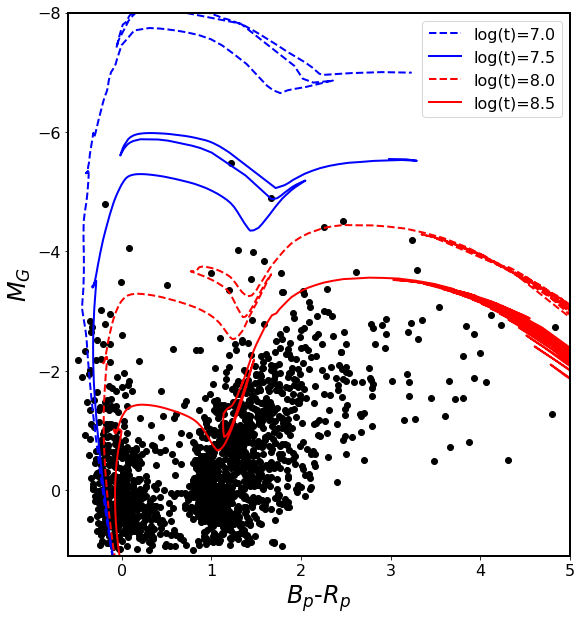

In [35]:
plt.figure(figsize=(9,10))
plt.ylim(1.1,-8)
plt.xlim(-0.6,5)
plt.scatter(bp_rp_extcorr1,M_G1, color='black')
#plt.plot(G_bprp60,Gmag60,'--',color='black',label='log(t)=6.0') 
#plt.plot(G_bprp65,Gmag65,color='black',label='log(t)=6.5')
plt.plot(G_bprp70,Gmag70,'--',color='blue',label='log(t)=7.0')
plt.plot(G_bprp75,Gmag75,color='blue',label='log(t)=7.5')
plt.plot(G_bprp80,Gmag80,'--',color='red',label='log(t)=8.0') 
plt.plot(G_bprp85,Gmag85,'-',color='red',label='log(t)=8.5')  
#plt.plot(G_bprp90,Gmag90,'--',color='orange',label='log(t)=9.0')
#plt.plot(G_bprp95,Gmag95,color='green',label='log(t)=9.5')
#plt.plot(G_bprp10,Gmag10,'--',color='orange',label='log(t)=10.0')
#plt.title('Extinction Corrected')
plt.xlabel('$B_{p}$-$R_{p}$',)
plt.ylabel('$M_{G}$')
plt.legend()
plt.show()

v_cpy
vx_star
vz_star

In [17]:
# dot_yx_cpstar =[]
# dot_yz_cpstar =[]

# for i in range(len(v_xstar)):
#     dot_ycp_xstar = np.dot(v_cpy,v_xstar[i])
#     dot_ycp_zstar = np.dot(v_cpy,v_zstar[i])
#     dot_yx_cpstar.append(dot_ycp_xstar)
#     dot_yz_cpstar.append(dot_ycp_zstar)

# print(len(dot_yx_cpstar))
# print(len(dot_yz_cpstar))

In [18]:
# plt.plot(dot_yx_cpstar,dot_yz_cpstar,'.')
# plt.xlabel('${v_{cp_{y}}}\cdot{v_{\star_{x}}}$')
# plt.ylabel('${v_{cp_{y}}}\cdot{v_{\star_{z}}}$')
# plt.show()
# # plt.plot(dot_yz_cpstar,dot_yx_cpstar,'.')

In [19]:
from astropy import units as u
from astropy.coordinates import SkyCoord

def convert_radec_deg(str_ra_dec):
    ra_dec_deg = SkyCoord(str_ra_dec, unit=(u.hourangle, u.deg))
    ra_deg = ra_dec_deg.ra.degree
    dec_deg = ra_dec_deg.dec.degree
    return ra_deg, dec_deg

def convert_to_cartesian(pos_ra_dec):
    v_x = (1)*(np.sin((np.pi/180)*(90-pos_ra_dec[1]))*np.cos((np.pi*pos_ra_dec[0])/180))
    v_y = (1)*(np.sin((np.pi/180)*(90-pos_ra_dec[1]))*np.sin((np.pi*pos_ra_dec[0])/180))
    v_z = (1)*(np.cos((np.pi/180)*(90-pos_ra_dec[1])))
    v = [v_x,v_y,v_z]
    return v

In [20]:
# pos_rs = position of random star with in the 100 pc - I get the first one 
pos_rs = [accpt_ra[0],accpt_dec[0]]
v_rs = (1000*(np.array(convert_to_cartesian(pos_rs))))/dist_par[0]
print('v_rs=',v_rs)
unit_rs = v_rs/np.linalg.norm(v_rs)
print(unit_rs)

v_rs1 = np.cross(v_rs,unit_vcp)
print('v_rs1= ',v_rs1)

unit_vrs1 = v_rs1/np.linalg.norm(v_rs1)
# print(magnitude(unit_vrs1))

v_rs2=np.cross(unit_vcp,unit_vrs1)
unit_vrs2 = v_rs2/np.linalg.norm(v_rs2)

e_x = np.cross(unit_vrs2,unit_vcp)
print('e_x= ',e_x)

e_y = np.cross(unit_vrs1,unit_vcp)
print('e_y= ',e_y)

# if 0, vectors are orthogonal
check1 = np.dot(e_x,unit_vcp)
print('check1= ',check1)

check2 = np.dot(e_y,unit_vcp)
print('check2= ',check2)

check3 = np.dot(e_x,e_y)
print('check3= ',check3)

#check that unit vector magnitudes are = 1  
# make sure that dot products values found above are the same as the z values found below 

v_rs= [  80.09521614 1237.90788701  419.98992182]
[0.06115702 0.94520948 0.32068497]
v_rs1=  [ 77.05239932  13.15618576 -53.47193714]
e_x=  [ 0.81358763  0.13891469 -0.56460418]
e_y=  [ 0.57228076 -0.36301312  0.73533408]
check1=  -2.7755575615628914e-17
check2=  5.551115123125783e-17
check3=  -5.551115123125783e-17


In [21]:
accpt_x_pos_stars = []
accpt_y_pos_stars = []
accpt_z_pos_stars = []

for i in range(len(accpt_v_star)):

    #x_pos_stars = np.dot(np.cross(accpt_v_star[i],unit_vcp),unit_vrs2)
    x_pos_stars = np.dot(e_x,accpt_v_star[i])
    y_pos_stars = np.dot(e_y,accpt_v_star[i])
    z_pos_stars = np.dot(unit_vcp,accpt_v_star[i])
    accpt_x_pos_stars.append(x_pos_stars)
    accpt_y_pos_stars.append(y_pos_stars)
    accpt_z_pos_stars.append(z_pos_stars)

print('x pos: ',accpt_x_pos_stars[0:4])
print('y pos: ',accpt_y_pos_stars[0:4])



x pos:  [0.0, -38.12884754045541, -70.1332624808503, 35.94722041651136]
y pos:  [-95.81412386881368, 8.789393983172374, 9.096137099961254, -19.556685905802624]


In [22]:
print(len(accpt_v_star))

1943


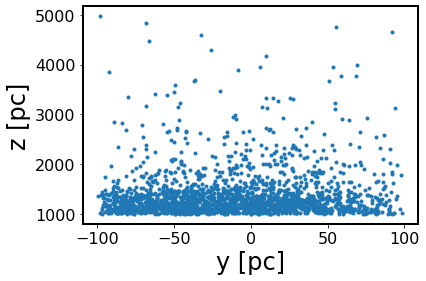

In [23]:
plt.plot(accpt_y_pos_stars,accpt_z_pos_stars,'.')
plt.xlabel('y [pc]')
plt.ylabel('z [pc]')
plt.show()

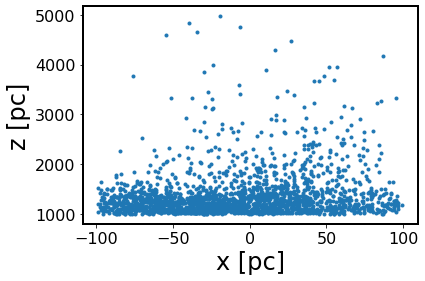

In [24]:
plt.plot(accpt_x_pos_stars,accpt_z_pos_stars,'.')
plt.xlabel('x [pc]')
plt.ylabel('z [pc]')
plt.show()

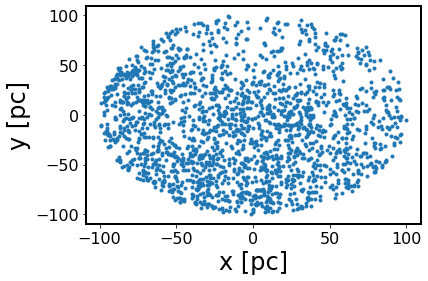

In [25]:
#plt.figure(figsize=(7,7))
plt.plot(accpt_x_pos_stars,accpt_y_pos_stars,'.')
plt.xlabel('x [pc]')
plt.ylabel('y [pc]')
plt.show()

In [26]:
import pandas as pd
from numpy import *

cpstars  = pd.read_csv('cpstars-run15-result.csv', usecols=([1,2,3,4,5,6,7,8,9,10,11,12,13]))


In [27]:
source_id_cpstars = np.array(cpstars['source_id'].tolist())
ra_cpstars = np.array(cpstars['ra'].tolist())
dec_cpstars = np.array(cpstars['dec'].tolist())
parallax_cpstars = np.array(cpstars['parallax'].tolist())
phot_gmag_cpstars = np.array(cpstars['phot_g_mean_mag'].tolist())
phot_bp_mean_mag_cpstars = np.array(cpstars['phot_bp_mean_mag'].tolist())
phot_rp_mean_mag_cpstars = np.array(cpstars['phot_rp_mean_mag'].tolist())
bp_rp_cpstars = np.array(cpstars['bp_rp'].tolist())